# Data Visualization for Royal Road Schemas

CSV Format:
`crossover_id, run_id, generation, avg_fitness, best_fitness, schema1_count, schema2_count, ..., scheman_count`

## Research Questions

1. What crossover mechanism leads to the most diverse set of building blocks during evolution?
2. What crossover mechanism minimizes the average number of generations to find an optimal solution?
2. What crossover mechanism is least likely to have building blocks "die out" of the population?

## Notebook Philosophy

I have *strong* opinions about notebooks. This should be used by:

a) updating values in the first couple blocks

b) running the whole thing top to bottom

c) seeing the results at the end
 
You do not need to interact with anthing in between, and it's fully able to be looped by modifying those global variables.

Other behavior added should adhere to this atomic/hands-off style for notebooks rather than building large, interactive pipelines.

In [104]:
GENS = 2000
RUNS = 50
POP = 128
RR = 2 # 1 or 2 for whichever royal road
BLOCKS = 8 if RR == 1 else 14
OPTIMAL = 64 if RR == 1 else 192

In [105]:
crossover = '2' # from 'U', '1', '2'

Change the blocks above to ensure parameters match the parameters used in the experiment. Everything else will be dynamically calculated from there.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [107]:
def get_file_name(xr):
    return f'../data/rr{'1' if RR == 1 else '2'}/royalroad{'' if RR == 1 else '2'}_{'uni' if crossover == "U" else ('1pt' if crossover == "1" else "2pt")}_{'50' if xr == 0.5 else ('70' if xr == 0.7 else '100')}_stats.csv'

In [108]:
def rotate_2d_array(arr):
    arr = list(reversed(arr))
    transposed_arr = list(zip(*arr))
    rotated_arr = [list(row)[::-1] for row in transposed_arr]
    return rotated_arr

In [109]:
blue = "#1f77b4"
orange = "#ff7f0e"
green = "#2ca02c"
red = "#d62728"
purple = "#9467bd"
brown = "#8c564b"
pink = "#e377c2"
amber = "#ffbb78"
gray = "#7f7f7f"
yellow = "#ffdb58"
cyan = "#00ffff"
magenta = "#ff00ff"
lime = "#00ff00"
teal = "#008080"
lavender = "#e6e6fa"
colors = [blue, orange, green, red, purple, brown, pink, gray, yellow, cyan, magenta, lime, teal, lavender][:BLOCKS]

In [110]:
lambdas = [0.5, 0.7, 1.0]
frames = list(map(lambda x: pd.read_csv(get_file_name(x)), lambdas))


In [111]:
def get_first_gen_with_optimal_fitness_for_run(df, run):
    return df[(df["run_id"] == run) & (df["best_fitness"] == OPTIMAL)]["generation"].min() or -1

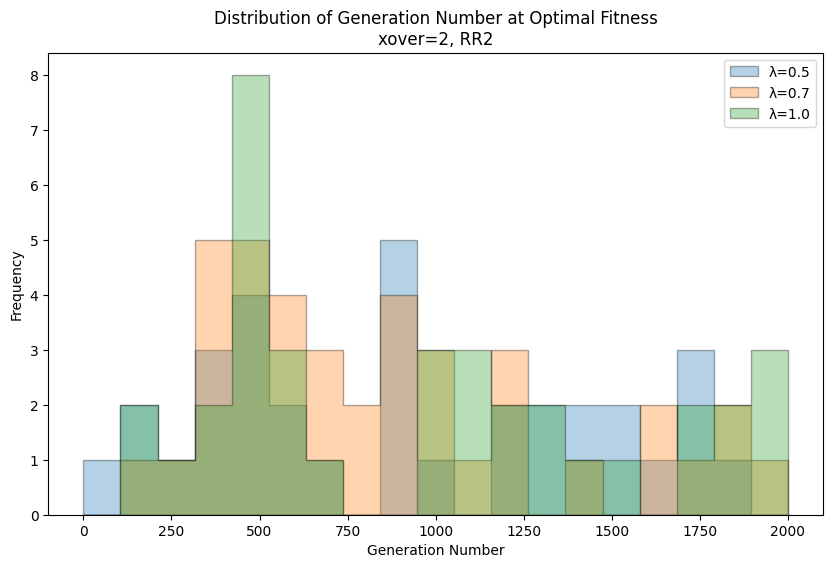

<Figure size 640x480 with 0 Axes>

In [112]:
plt.figure(figsize=(10, 6))

bins = np.linspace(
    0,
    2000,
    20,
)
bar_width = 33

positions = ['left', 'mid', 'right']

for i in range(len(frames)):
    df = frames[i]
    first_gen_with_optimal = [get_first_gen_with_optimal_fitness_for_run(df, run) for run in range(RUNS)]
    generation_numbers = [gen for gen in first_gen_with_optimal if gen != -1]
    plt.hist(generation_numbers, bins=bins, color=colors[i], edgecolor="black", alpha=1/3, histtype='stepfilled', label=f"λ={lambdas[i]}")


# Plotting the histogram
plt.title(
    f"Distribution of Generation Number at Optimal Fitness\nxover={crossover}, RR{RR}"
)
plt.xlabel("Generation Number")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.savefig(
    f'rr{"1" if RR == 1 else "2"}/rr{"1" if RR == 1 else "2"}_{crossover}_1st_optimal.png',
    bbox_inches="tight",
)